<a href="https://colab.research.google.com/github/M4Y0H/Google-Colab-Projects/blob/main/0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 15.48 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [ ]:
import numpy as np
import torch
from PIL import Image
import torchvision.models as models
from torchvision import transforms

In [ ]:
img = Image.open('/content/clothing-dataset-small/train/dress/04f0b07f-4b9f-4c55-bc5d-b693658fb32c.jpg')
res_i = img.resize((255, 255))

In [ ]:
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x534 at 0x7F28F163B050>


array([[[246, 255, 251],
        [251, 255, 251],
        [255, 254, 249],
        ...,
        [ 56,  25,  24],
        [ 58,  27,  26],
        [ 54,  23,  21]],

       [[251, 255, 252],
        [254, 255, 252],
        [255, 251, 246],
        ...,
        [ 53,  24,  23],
        [ 55,  25,  24],
        [ 52,  22,  20]],

       [[254, 254, 249],
        [255, 252, 249],
        [254, 244, 241],
        ...,
        [ 52,  24,  24],
        [ 52,  24,  23],
        [ 51,  23,  23]],

       ...,

       [[ 84,  25,  25],
        [ 85,  26,  26],
        [ 85,  26,  26],
        ...,
        [129,  38,  38],
        [131,  41,  41],
        [134,  44,  44]],

       [[ 84,  26,  25],
        [ 85,  27,  26],
        [ 85,  27,  26],
        ...,
        [114,  33,  32],
        [117,  35,  34],
        [119,  37,  37]],

       [[ 84,  26,  25],
        [ 85,  27,  26],
        [ 85,  27,  26],
        ...,
        [111,  33,  31],
        [110,  32,  30],
        [109,  30,  28]]], dtype=uint8)
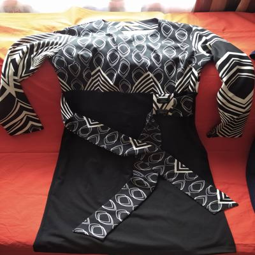

In [ ]:
ar = np.array(res_i)
ar

In [ ]:
model = models.mobilenet_v2(weights='IMAGENET1K_V1')
model.eval();

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 184MB/s]


In [ ]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
preprocess(img)

tensor([[[-0.8849, -1.0219, -1.1247,  ...,  1.9578,  1.9064,  1.8893],
         [-1.1418, -1.1418, -1.1589,  ...,  1.9407,  1.9064,  1.9407],
         [-1.0219, -1.1589, -1.0562,  ...,  1.9407,  1.9235,  1.9749],
         ...,
         [ 1.8208,  1.8722,  1.8893,  ...,  1.7694,  1.8208,  1.8208],
         [ 1.8037,  1.8722,  1.8893,  ...,  1.8893,  1.8379,  1.8379],
         [ 1.8379,  1.8379,  1.9064,  ...,  1.9407,  1.9064,  1.8722]],

        [[-0.9678, -1.1253, -1.2479,  ...,  0.7129,  0.6254,  0.5728],
         [-1.2654, -1.2654, -1.3004,  ...,  0.7479,  0.6954,  0.6954],
         [-1.1954, -1.3004, -1.2129,  ...,  0.8354,  0.7829,  0.7829],
         ...,
         [-0.0924, -0.0399, -0.0224,  ..., -0.3200, -0.2850, -0.3025],
         [-0.1099, -0.0399, -0.0224,  ..., -0.3200, -0.3725, -0.3550],
         [-0.0749, -0.0749, -0.0049,  ..., -0.3025, -0.3200, -0.3375]],

        [[-0.7761, -0.8981, -1.0201,  ...,  0.1651,  0.1128,  0.0605],
         [-0.9156, -0.9156, -0.9853,  ...,  0

In [ ]:
batch_t = torch.unsqueeze(preprocess(img), 0)
batch_t

tensor([[[[-0.8849, -1.0219, -1.1247,  ...,  1.9578,  1.9064,  1.8893],
          [-1.1418, -1.1418, -1.1589,  ...,  1.9407,  1.9064,  1.9407],
          [-1.0219, -1.1589, -1.0562,  ...,  1.9407,  1.9235,  1.9749],
          ...,
          [ 1.8208,  1.8722,  1.8893,  ...,  1.7694,  1.8208,  1.8208],
          [ 1.8037,  1.8722,  1.8893,  ...,  1.8893,  1.8379,  1.8379],
          [ 1.8379,  1.8379,  1.9064,  ...,  1.9407,  1.9064,  1.8722]],

         [[-0.9678, -1.1253, -1.2479,  ...,  0.7129,  0.6254,  0.5728],
          [-1.2654, -1.2654, -1.3004,  ...,  0.7479,  0.6954,  0.6954],
          [-1.1954, -1.3004, -1.2129,  ...,  0.8354,  0.7829,  0.7829],
          ...,
          [-0.0924, -0.0399, -0.0224,  ..., -0.3200, -0.2850, -0.3025],
          [-0.1099, -0.0399, -0.0224,  ..., -0.3200, -0.3725, -0.3550],
          [-0.0749, -0.0749, -0.0049,  ..., -0.3025, -0.3200, -0.3375]],

         [[-0.7761, -0.8981, -1.0201,  ...,  0.1651,  0.1128,  0.0605],
          [-0.9156, -0.9156, -

In [ ]:
batch_t.size()

torch.Size([1, 3, 224, 224])

In [ ]:
preprocess(img).size()

torch.Size([3, 224, 224])

In [ ]:
with torch.no_grad():
    prediction = model(batch_t)

In [ ]:
ind = prediction.indices
ind

<function Tensor.indices>

In [ ]:
_,indices = torch.sort(prediction, descending=True)
indices[0][:]

tensor([638, 578, 614, 885, 775, 399, 639, 697, 457, 689, 906, 842, 721, 834,
        414, 824, 459, 490, 601, 445, 748, 608, 655, 793, 514, 411, 496, 643,
        636, 439, 461, 610, 524, 501, 869, 735, 796, 808, 774, 911, 340, 452,
        903, 841, 917, 831, 750, 456, 529, 541, 678, 433, 237, 151, 570, 797,
        568, 591, 921, 197, 883, 400, 253, 641, 679, 464, 857, 785, 676, 887,
        777, 612, 181, 836, 502, 806, 560, 549, 543, 658, 584, 747, 236, 629,
        770, 850, 854, 790, 290, 588, 488, 982, 589, 246, 879, 787, 741, 652,
        615, 898, 709, 786, 474, 198, 593, 423, 788, 893, 837, 165, 749, 515,
        268, 650, 763, 728, 667, 523, 670, 240, 692, 597, 227, 711, 242, 862,
        585, 251, 150, 878, 176, 823, 699, 234, 623, 447, 513, 981, 238, 563,
        178, 211, 159, 936, 552, 719, 465, 966, 206, 558, 208, 451, 801, 443,
        691, 606, 965, 254, 431, 416, 171, 195, 112, 262, 200, 518, 385,  63,
        789, 542, 285, 202, 273, 810, 429, 602, 222, 566, 759, 6

In [ ]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt -O imagenet_classes.txt

--2025-12-28 13:06:42--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2025-12-28 13:06:42 (100 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [ ]:
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

top5_indices = indices[0, :5].tolist()
top5_classes = [categories[i] for i in top5_indices]

print("Top 5 predictions:")
for i, class_name in enumerate(top5_classes):
    print(f"{i+1}: {class_name}")

Top 5 predictions:
1: maillot
2: gown
3: kimono
4: velvet
5: sarong


In [ ]:
import os
from torch.utils.data import Dataset

class ClothingDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.classes = sorted(os.listdir(data_dir))
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}

        for label_name in self.classes:
          label_paths = os.path.join(data_dir, label_name)
          for img_name in os.listdir(label_paths):
            self.image_paths.append(os.path.join(label_paths, img_name))
            self.labels.append(self.class_to_idx[label_name])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
input_size = 224

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

val_transforms = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

In [ ]:
from torch.utils.data import DataLoader

train_dataset = ClothingDataset(
    data_dir='./clothing-dataset-small/train',
    transform=train_transforms
)

val_dataset = ClothingDataset(
    data_dir='./clothing-dataset-small/validation',
    transform=val_transforms
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch.nn as nn

class ClothingClassifier(nn.Module):
    def __init__(self, num_classes=10, size_inner=100, drop_rate=.2):
        super(ClothingClassifier, self).__init__()
        self.my_model = models.mobilenet_v2(weights='IMAGENET1K_V1')
        for params in self.my_model.parameters():
            params.requires_grad = False
        self.my_model.classifier = nn.Identity()
        self.global_avg_pooling = nn.AdaptiveAvgPool2d((1,1))
        self.inner = nn.Linear(1280, size_inner)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(drop_rate)
        self.output_layer = nn.Linear(size_inner, num_classes)

    def forward (self, x):
        x = self.my_model.features(x)
        x = self.global_avg_pooling(x)
        x = torch.flatten(x, 1)
        x = self.inner(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.output_layer(x)
        return x

In [ ]:
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#model = ClothingClassifier(num_classes=10)
#model.to(device)

#optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [ ]:
num_epochs = 10
def train_and_evaluate_with_checkpointing(model, optimizer, train_loader, val_loader, criterion, num_epochs, device):
    best_val_accuracy = 0.0
    for epochs in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = correct/total

        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs =  model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                val_total += labels.size(0)
                _, predicted = torch.max(outputs.data, dim=1)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = val_correct/val_total


        print(f'Epoch {epochs+1}/{num_epochs}')
        print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
        print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

        if val_acc > best_val_accuracy:
            best_val_accuracy = val_acc
            checkpoint_path = f'mobilenet_v2_{epochs+1:02d}_{val_acc:.3f}.pth'
            torch.save(model.state_dict(), checkpoint_path)
            print(f'Checkpoint saved: {checkpoint_path}')

In [ ]:
def make_model(learning_rate=0.01, size_inner=100, drop_rate=.2):
    model = ClothingClassifier(num_classes=10, size_inner=size_inner, drop_rate=drop_rate)
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    return model, optimizer

In [ ]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]

for lr in learning_rates:b
    print(f'\n=== Learning Rate: {lr} ===')
    model, optimizer = make_model(learning_rate=lr)
    train_and_evaluate(model, optimizer, train_loader, val_loader, criterion, num_epochs, device)


=== Learning Rate: 0.0001 ===
Epoch 1/10
  Train Loss: 1.9530, Train Acc: 0.3471
  Val Loss: 1.6974, Val Acc: 0.4604
Epoch 2/10
  Train Loss: 1.5322, Train Acc: 0.5091
  Val Loss: 1.3398, Val Acc: 0.5718
Epoch 3/10
  Train Loss: 1.2609, Train Acc: 0.6033
  Val Loss: 1.1092, Val Acc: 0.6686
Epoch 4/10
  Train Loss: 1.0730, Train Acc: 0.6851
  Val Loss: 0.9674, Val Acc: 0.7038
Epoch 5/10
  Train Loss: 0.9657, Train Acc: 0.7089
  Val Loss: 0.8734, Val Acc: 0.7243
Epoch 6/10
  Train Loss: 0.8797, Train Acc: 0.7386
  Val Loss: 0.8172, Val Acc: 0.7361
Epoch 7/10
  Train Loss: 0.8185, Train Acc: 0.7500
  Val Loss: 0.7520, Val Acc: 0.7595
Epoch 8/10
  Train Loss: 0.7670, Train Acc: 0.7715
  Val Loss: 0.7145, Val Acc: 0.7742
Epoch 9/10
  Train Loss: 0.7217, Train Acc: 0.7771
  Val Loss: 0.6823, Val Acc: 0.7830
Epoch 10/10
  Train Loss: 0.6949, Train Acc: 0.7943
  Val Loss: 0.6717, Val Acc: 0.7537

=== Learning Rate: 0.001 ===
Epoch 1/10
  Train Loss: 1.3793, Train Acc: 0.5492
  Val Loss: 0.880

In [ ]:
import torch
!pip install torchsummary
from torchsummary import summary

summary(model, (3, input_size, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

In [ ]:
big_epochs = 50
for drop_rate in [0.2]:
    print(f'\n=== Drop Rate: {drop_rate} ===')
    model, optimizer = make_model(learning_rate=0.001, size_inner=1000, drop_rate=drop_rate)
    train_and_evaluate_with_checkpointing(model, optimizer, train_loader, val_loader, criterion, big_epochs, device)


=== Drop Rate: 0.2 ===
Epoch 1/50
  Train Loss: 1.1033, Train Acc: 0.6216
  Val Loss: 0.7063, Val Acc: 0.7361
Checkpoint saved: mobilenet_v2_01_0.736.pth
Epoch 2/50
  Train Loss: 0.6701, Train Acc: 0.7604
  Val Loss: 0.6144, Val Acc: 0.7654
Checkpoint saved: mobilenet_v2_02_0.765.pth
Epoch 3/50
  Train Loss: 0.5652, Train Acc: 0.8051
  Val Loss: 0.5903, Val Acc: 0.7859
Checkpoint saved: mobilenet_v2_03_0.786.pth
Epoch 4/50
  Train Loss: 0.4800, Train Acc: 0.8308
  Val Loss: 0.5319, Val Acc: 0.8123
Checkpoint saved: mobilenet_v2_04_0.812.pth
Epoch 5/50
  Train Loss: 0.4571, Train Acc: 0.8406
  Val Loss: 0.5476, Val Acc: 0.7977
Epoch 6/50
  Train Loss: 0.4107, Train Acc: 0.8553
  Val Loss: 0.5858, Val Acc: 0.7918
Epoch 7/50
  Train Loss: 0.3797, Train Acc: 0.8719
  Val Loss: 0.6001, Val Acc: 0.8035
Epoch 8/50
  Train Loss: 0.3558, Train Acc: 0.8735
  Val Loss: 0.6011, Val Acc: 0.7977
Epoch 9/50
  Train Loss: 0.3162, Train Acc: 0.8778
  Val Loss: 0.6086, Val Acc: 0.8035
Epoch 10/50
  Tra

In [ ]:
path = './mobilenet_v2_20_0.839.pth'
def load_model_from_checkpoint(size_inner=1000, drop_rate=.2, latest_file=path):
    model = ClothingClassifier(num_classes=10, size_inner=size_inner, drop_rate=drop_rate)
    model.load_state_dict(torch.load(latest_file))
    model.to(device)
    return model

In [ ]:
best_model = load_model_from_checkpoint()
best_model.eval()

ClothingClassifier(
  (my_model): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel

In [ ]:
x = val_transforms(img)
x = x.to(device)
with torch.no_grad():
  predict = best_model(x.unsqueeze(0))

_, ind = torch.sort(predict, descending=True)
ind

tensor([[0, 2, 9, 4, 7, 3, 1, 8, 6, 5]], device='cuda:0')

In [ ]:
categories = train_dataset.classes

top5_indices = ind[0, :5].tolist()
top5_classes = [categories[i] for i in top5_indices]

print("Top 5 predictions:")
for i, class_name in enumerate(top5_classes):
    print(f"{i+1}: {class_name}")

Top 5 predictions:
1: dress
2: longsleeve
3: t-shirt
4: pants
5: shorts


In [ ]:
dict(zip(train_dataset.classes, predict[0].to(device)))

{'dress': tensor(5.7588, device='cuda:0'),
 'hat': tensor(-4.4548, device='cuda:0'),
 'longsleeve': tensor(0.2865, device='cuda:0'),
 'outwear': tensor(-3.2278, device='cuda:0'),
 'pants': tensor(-2.3787, device='cuda:0'),
 'shirt': tensor(-7.4196, device='cuda:0'),
 'shoes': tensor(-6.2406, device='cuda:0'),
 'shorts': tensor(-2.6649, device='cuda:0'),
 'skirt': tensor(-6.1587, device='cuda:0'),
 't-shirt': tensor(-0.1568, device='cuda:0')}

In [ ]:
!pip install onnxscript

dummy_input = torch.randn(1, 3, 224, 224).to(device)

onnx_path = "clothing_classifier_mobilenet_v2.onnx"

torch.onnx.export(
    model,
    dummy_input,
    onnx_path,
    verbose=True,
    input_names=['input'],
    output_names=['output'],
    dynamic_axes={
        'input': {0: 'batch_size'},
        'output': {0: 'batch_size'}
    }
)

print(f"Model exported to {onnx_path}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.4/693.4 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 13.1 MB/s eta 0:00:00


/tmp/ipython-input-2218811221.py:7: UserWarning: # 'dynamic_axes' is not recommended when dynamo=True, and may lead to 'torch._dynamo.exc.UserError: Constraints violated.' Supply the 'dynamic_shapes' argument instead if export is unsuccessful.
  torch.onnx.export(


[torch.onnx] Obtain model graph for `ClothingClassifier([...]` with `torch.export.export(..., strict=False)`...
[torch.onnx] Obtain model graph for `ClothingClassifier([...]` with `torch.export.export(..., strict=False)`... ✅
[torch.onnx] Run decomposition...
[torch.onnx] Run decomposition... ✅
[torch.onnx] Translate the graph into ONNX...
[torch.onnx] Translate the graph into ONNX... ✅
Applied 105 of general pattern rewrite rules.
Model exported to clothing_classifier_mobilenet_v2.onnx
